In [4]:
import collections

clay = collections.defaultdict(bool)

for line in open('2018/day17/part1').read().splitlines():
    a, brange = line.split(',')
    if a[0] == 'x':
        x = int(a.split('=')[1])
        y1, y2 = map(int, brange.split('=')[1].split('..'))

        for y in range(y1, y2 + 1):
            clay[(x, y)] = True
    else:
        y = int(a.split('=')[1])
        x1, x2 = map(int, brange.split('=')[1].split('..'))

        for x in range(x1, x2 + 1):
            clay[(x, y)] = True

ymin, ymax = min(clay, key=lambda p: p[1])[1], max(clay, key=lambda p: p[1])[1]

settled = set()
flowing = set()

def fill(pt, direction=(0, 1)):
    flowing.add(pt)

    below = (pt[0], pt[1] + 1)

    if not clay[below] and below not in flowing and 1 <= below[1] <= ymax:
        fill(below)

    if not clay[below] and below not in settled:
        return False

    left = (pt[0] - 1, pt[1])
    right = (pt[0] + 1, pt[1])

    left_filled = clay[left] or left not in flowing and fill(left, direction=(-1, 0))
    right_filled = clay[right] or right not in flowing and fill(right, direction=(1, 0))

    if direction == (0, 1) and left_filled and right_filled:
        settled.add(pt)

        while left in flowing:
            settled.add(left)
            left = (left[0] - 1, left[1])

        while right in flowing:
            settled.add(right)
            right = (right[0] + 1, right[1])

    return direction == (-1, 0) and (left_filled or clay[left]) or \
        direction == (1, 0) and (right_filled or clay[right])

fill((500, 0))

print('part 1:', len([pt for pt in flowing | settled if ymin <= pt[1] <= ymax]))
print('part 2:', len([pt for pt in settled if ymin <= pt[1] <= ymax]))

part 1: 34775
part 2: 27086


In [90]:
import networkx as nx
from nxpd import draw

def vn4(pt):
    return [n for n in neighbors4(pt) if n in valid]

def w(a, b, x):
    return 99 if field[b] == "#" else 1

def h(a, b):
    return 99 if field[b] == "#" else 1

field = {}
for row in range(11):
    for col in range(11):
        field[(row, col)] = "."
        
for col in (1,2,3,4,5,6,7,8, 9, 10):
    field[(4, col)] = "#"
    
for col in (0,1,2,3,4,5,6,7,8,9):
    field[(6, col)] = "#"
    

            
valid = field.keys()    
G = nx.Graph()

for coord in valid:
    G.add_node(coord)
    for neighbor in vn4(coord):
        if field[coord] == "#" or field[neighbor] == "#":
            continue
        G.add_edge(coord, neighbor)

In [91]:
pprint(list(nx.all_shortest_paths(G, (0,0), (3,3))))

[[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3)],
 [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (3, 2), (3, 3)],
 [(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3)],
 [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3)],
 [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3)],
 [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3)],
 [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3)],
 [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (3, 2), (3, 3)],
 [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (3, 2), (3, 3)],
 [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3)],
 [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3)],
 [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3)],
 [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3)],
 [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3)],
 [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3)],
 [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3)],
 [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3)

In [97]:
paths = list(nx.all_shortest_paths(G, (0,0), (3,3)))
print(len(paths))
print(len(paths[0]))

20
7


In [103]:
a = None
b = 1
b < a

TypeError: '<' not supported between instances of 'int' and 'NoneType'

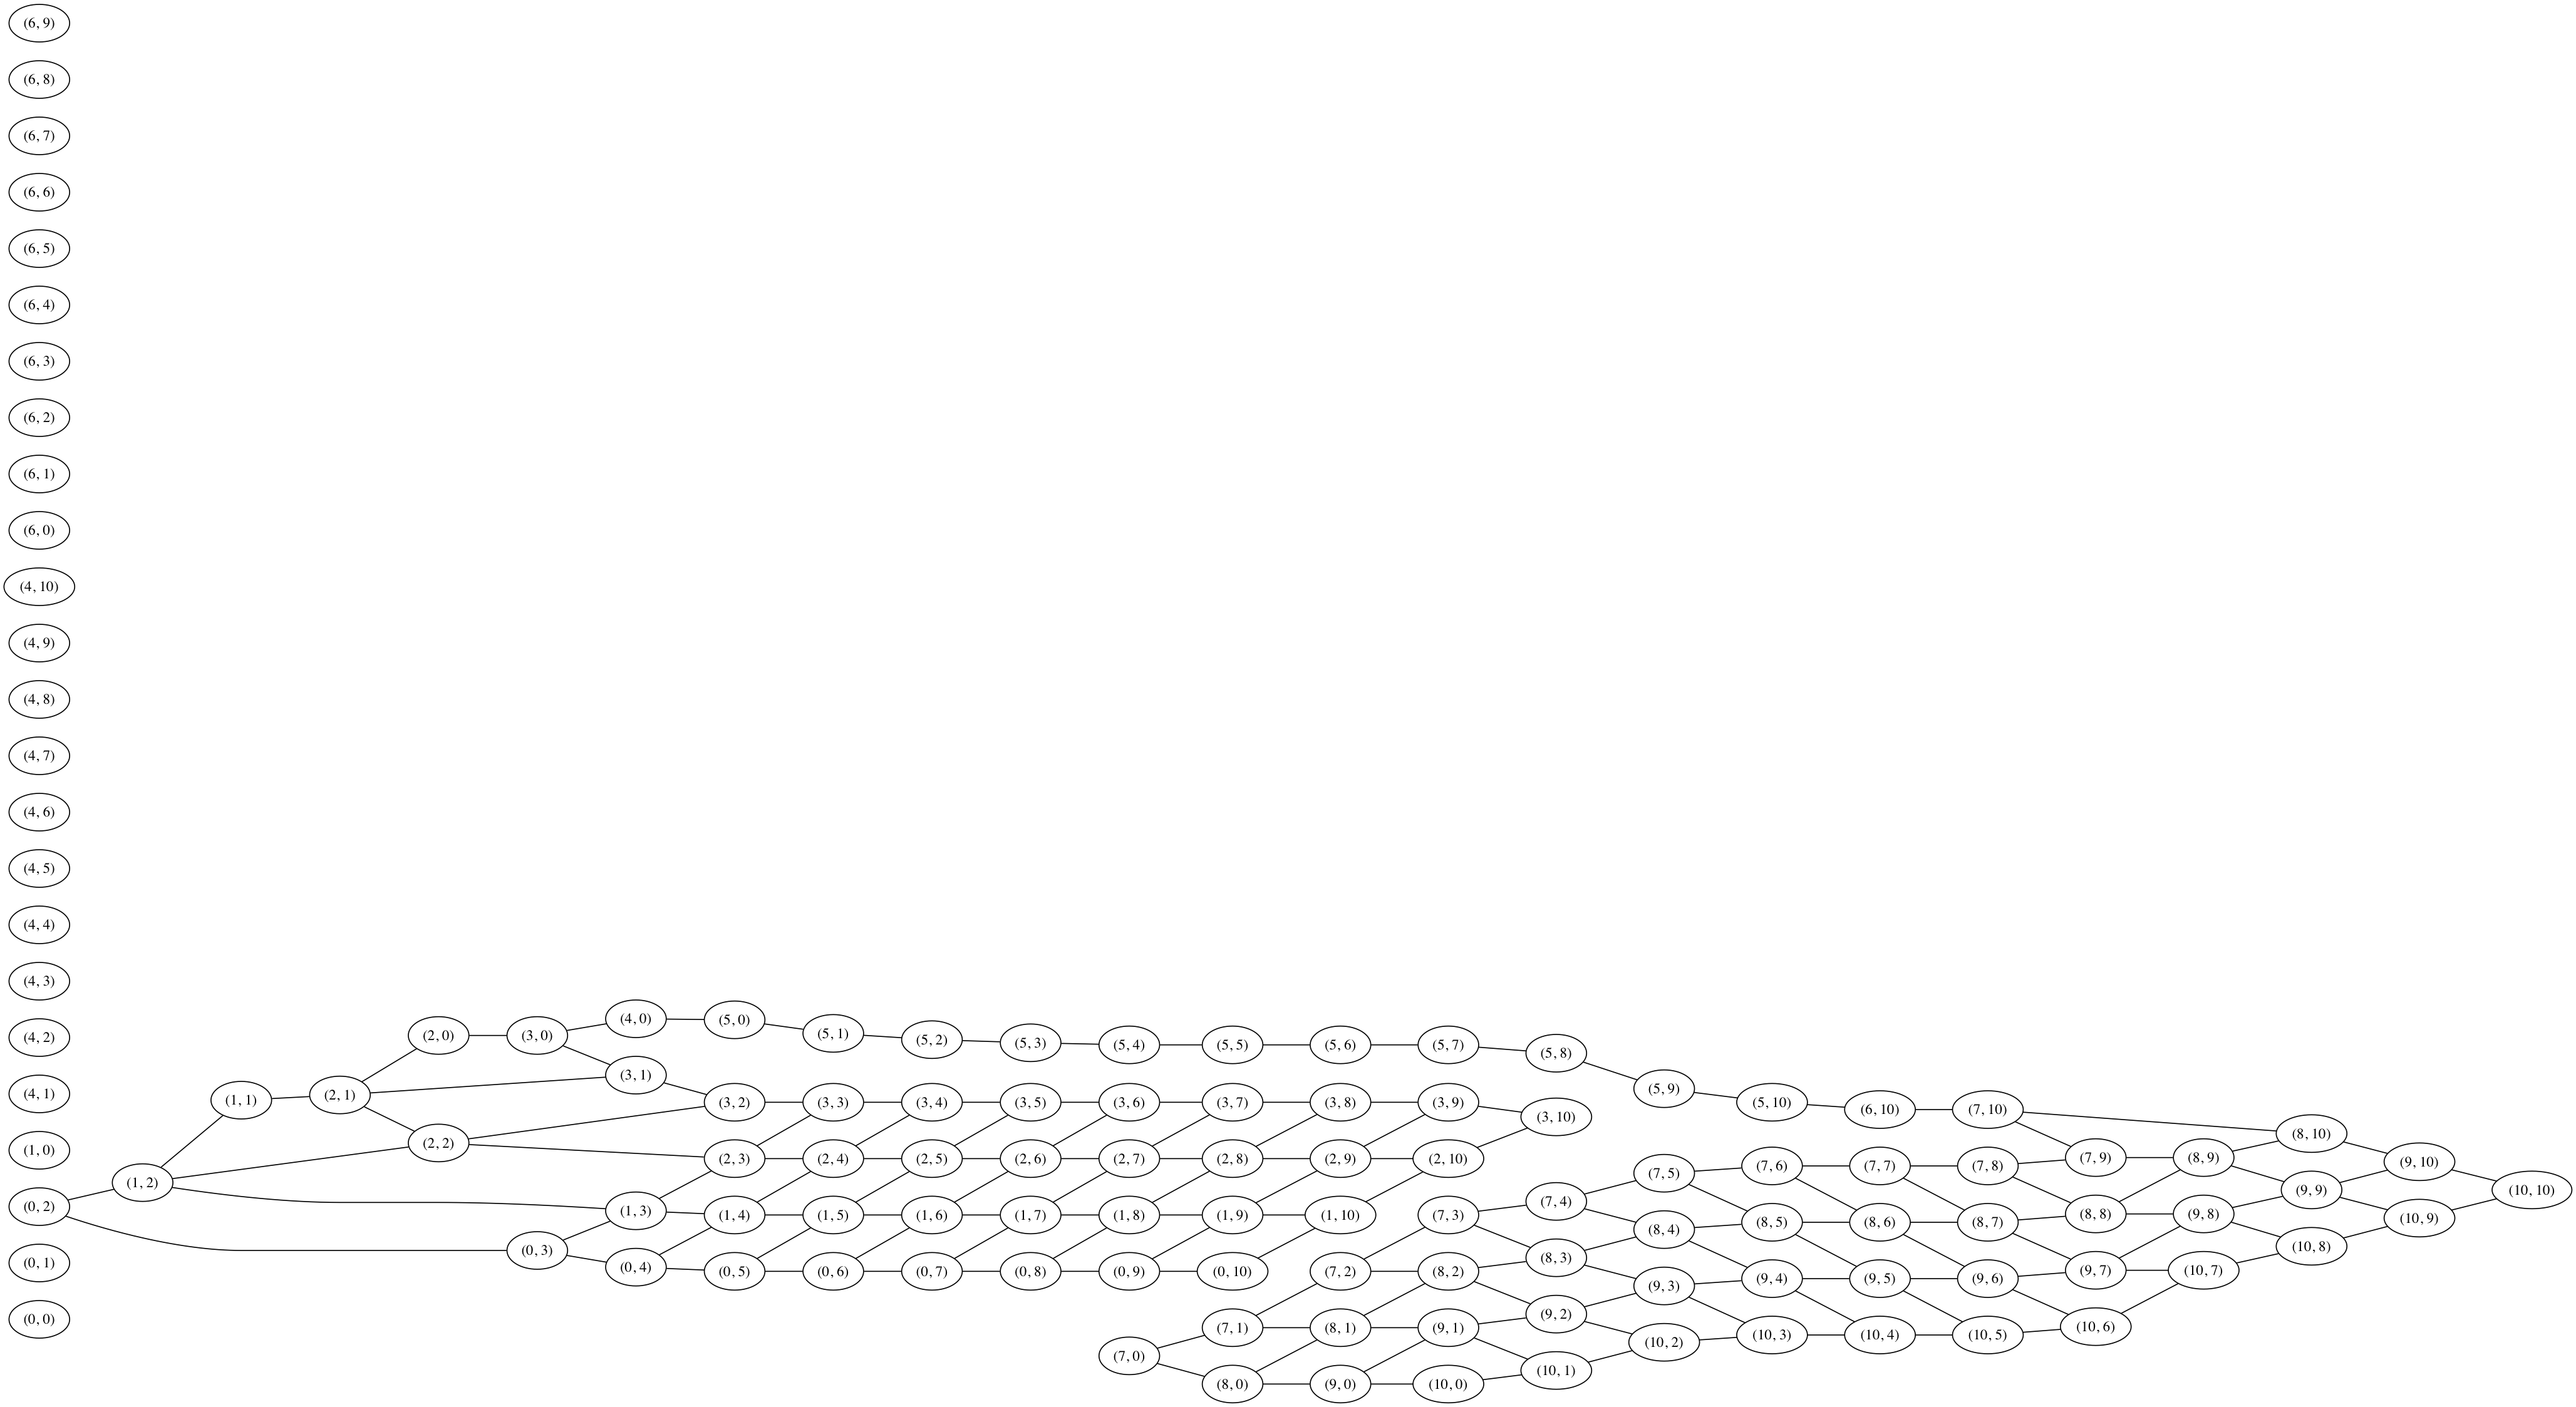

In [87]:
G.graph['rankdir'] = 'LR'
G.graph['dpi'] = 120
draw(G, show='ipynb')

In [62]:
# Utility
import re
import sys
import copy
import arrow
from pprint      import pprint
from collections import abc
from collections import Counter, defaultdict, namedtuple, deque
from functools   import lru_cache
from itertools   import permutations, combinations, chain, cycle, product, islice
from heapq       import heappop, heappush
from time        import sleep
from numba       import jit

def contents(year, day, part):
    with open(f'./{year}/day{day}/part{part}') as f:
        return f.read().splitlines()

def take(n, iterable, default=None):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n, default))

def nth(iterable, n, default=None):
    "Returns the nth item or a default value"
    return next(islice(iterable, n, None), default)

first = lambda iterable: nth(iterable, 0)
map_ints = lambda ints: list(map(int, list(ints)))
get_ints = lambda line: map_ints(re.findall(r'\d+', line))
cat = ''.join

def grouper(iterable, n, fillvalue=None):
    """Collect data into fixed-length chunks:
    grouper('ABCDEFG', 3, 'x') --> ABC DEF Gxx"""
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

def overlapping(iterable, n):
    """Generate all (overlapping) n-element subsequences of iterable.
    overlapping('ABCDEFG', 3) --> ABC BCD CDE DEF EFG"""
    if isinstance(iterable, abc.Sequence):
        yield from (iterable[i:i+n] for i in range(len(iterable) + 1 - n))
    else:
        result = deque(maxlen=n)
        for x in iterable:
            result.append(x)
            if len(result) == n:
                yield tuple(result)
                
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    return overlapping(iterable, 2)

def sequence(iterable, type=tuple):
    "Coerce iterable to sequence: leave alone if already a sequence, else make it `type`."
    return iterable if isinstance(iterable, abc.Sequence) else type(iterable)

def join(iterable, sep=''):
    "Join the items in iterable, converting each to a string first."
    return sep.join(map(str, iterable))
                
def powerset(iterable):
    "Yield all subsets of items."
    items = list(iterable)
    for r in range(len(items)+1):
        for c in combinations(items, r):
            yield c

################ 2-D points implemented using (x, y) tuples

origin = (0, 0)

def X(point): return point[0]
def Y(point): return point[1]

xy_HEADINGS = xy_UP, xy_LEFT, xy_DOWN, xy_RIGHT = (0, -1), (-1, 0), (0, 1), (1, 0)

def xy_turn_right(heading): return xy_HEADINGS[xy_HEADINGS.index(heading) - 1]
def xy_turn_around(heading):return xy_HEADINGS[xy_HEADINGS.index(heading) - 2]
def xy_turn_left(heading):  return xy_HEADINGS[xy_HEADINGS.index(heading) - 3]


def R(point): return point[0]
def C(point): return point[1]

rc_HEADINGS = rc_UP, rc_LEFT, rc_DOWN, rc_RIGHT = (-1, 0), (0, -1), (1, 0), (0, 1)

def rc_turn_right(heading): return rc_HEADINGS[rc_HEADINGS.index(heading) - 1]
def rc_turn_around(heading):return rc_HEADINGS[rc_HEADINGS.index(heading) - 2]
def rc_turn_left(heading):  return rc_HEADINGS[rc_HEADINGS.index(heading) - 3]


def neighbors4(point): 
    "The four neighboring squares."
    x, y = point
    return (          (x, y-1),
            (x-1, y),           (x+1, y), 
                      (x, y+1))

def neighbors8(point): 
    "The eight neighboring squares."
    x, y = point 
    return ((x-1, y-1), (x, y-1), (x+1, y-1),
            (x-1, y),             (x+1, y),
            (x-1, y+1), (x, y+1), (x+1, y+1))

def add(A, B): 
    "Element-wise addition of two n-dimensional vectors."
    return mapt(sum, zip(A, B))

def cityblock_distance(P, Q=origin): 
    "Manhatten distance between two points."
    return sum(abs(p - q) for p, q in zip(P, Q))

def distance(P, Q=origin): 
    "Straight-line (hypotenuse) distance between two points."
    return sum((p - q) ** 2 for p, q in zip(P, Q)) ** 0.5

def king_distance(P, Q=origin):
    "Number of chess King moves between two points."
    return max(abs(p - q) for p, q in zip(P, Q))

################ functional

def mapt(fn, *args): 
    "Do a map, and make the results into a tuple."
    return tuple(map(fn, *args))

################ A* and Breadth-First Search (tracking states, not actions)

def always(value): return (lambda *args: value)

def Astar(start, moves_func, h_func, cost_func=always(1)):
    "Find a shortest sequence of states from start to a goal state (where h_func(s) == 0)."
    frontier  = [(h_func(start), start)] # A priority queue, ordered by path length, f = g + h
    previous  = {start: None}  # start state has no previous state; other states will
    path_cost = {start: 0}     # The cost of the best path to a state.
    Path      = lambda s: ([] if (s is None) else Path(previous[s]) + [s])
    while frontier:
        (f, s) = heappop(frontier)
        if h_func(s) == 0:
            return Path(s)
        for s2 in moves_func(s):
            g = path_cost[s] + cost_func(s, s2)
            if s2 not in path_cost or g < path_cost[s2]:
                heappush(frontier, (g + h_func(s2), s2))
                path_cost[s2] = g
                previous[s2] = s

def bfs(start, moves_func, goals):
    "Breadth-first search"
    goal_func = (goals if callable(goals) else lambda s: s in goals)
    return Astar(start, moves_func, lambda s: (0 if goal_func(s) else 1))

################ timing info

import time

def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('%r  %2.2f ms' % (method.__name__, (te - ts) * 1000))
        return result
    return timed
    

In [90]:
"""
Day 17
"""

@timeit
def day17():
    def display(t, data, xmax, ymax):
        from PIL import Image, ImageDraw
        im = Image.new("1", (xmax+100,ymax+10), 1)
        draw = ImageDraw.Draw(im)
        [draw.point(d, 0) for d in data.keys()]
        draw.point((500,0), 0)
        #im.save(f"./2018/day17/map.bmp", "BMP")
        im.show()
        
    def simple(ground, xmin, xmax, ymin, ymax):
        for y in range(ymin, ymax+1):
            for x in range(xmin, xmax+1):
                print(ground[(x,y)], end="")
            print()
        
    raw = contents(2018,17,1)
    raw = """x=495, y=2..7
y=7, x=495..501
x=501, y=3..7
x=498, y=2..4
x=506, y=1..2
x=498, y=10..13
x=504, y=10..13
y=13, x=498..504""".splitlines()
    
    lines = 0
    points = 0
    ground = dict()
    for line in raw:
        lines += 1
        ints = get_ints(line)

        if line[0] == "x":
            xr = (ints[0], ints[0])
            yr = (ints[1], ints[2])
        else:
            yr = (ints[0], ints[0])
            xr = (ints[1], ints[2])
    
        for x in range(xr[0], xr[1]+1):
            for y in range(yr[0], yr[1]+1):
                points += 1
                ground[(x,y)] = "#"
    
    xmin = min(e[0] for e in ground.keys())
    xmax = max(e[0] for e in ground.keys())
    ymin = min(e[1] for e in ground.keys())
    ymax = max(e[1] for e in ground.keys())
    print(xmin, ymin, '-', xmax, ymax)
    #display(0, ground, xmax, ymax)
    
    for x in range(xmin, xmax + 1):
        for y in range(0, ymax + 1):
            ground[(x,y)] = ground.get((x,y), ".")
            
    ground[(500,0)] = "+"
    waters = [(500,1)]
    
    def find_right(pt):
        rv = pt
        while ground[rv] != "#":
            rv = add(rv, xy_RIGHT)
        return add(rv, xy_LEFT)
    
    def fill_left(pt):
        left = add(pt, xy_LEFT)
        while ground[left] != "#" and X(left) > xmin:
            ground[left] = "~"
            left = add(left, xy_LEFT)
    
    def fill(pt):
        pt = add(pt, xy_UP)
        pt = find_right(pt)
        ground[pt] = "~"
        while ground[add(pt, xy_RIGHT)] != ".":
            fill_left(pt)
            pt = add(pt, xy_UP)
        fill_left(pt)
        pt = add(pt, xy_RIGHT)
        ground[pt] = "|"
        pt = add(pt, xy_RIGHT)
        ground[pt] = "|"
        return pt
        
        
    try:
        while True:
            for idx, water in enumerate(waters):
                if ground[water] != "#":
                    ground[water] = "|"
                    waters[idx] = add(water, xy_DOWN)
                else:
                    waters[idx] = fill(water)
    except:
        simple(ground, xmin, xmax, 0, ymax)
                
    print()
    print()
    simple(ground, xmin, xmax, 0, ymax)
              
        
    
    
    

day17()

495 1 - 506 13
.....+......
.....|.....#
#..#~|||...#
#..#~|#|....
#..#~|#|....
#~~~~|#|....
#~~~~~#|....
#######|....
.......|....
.~~~~~~~.||.
...#~~~~.#|.
...#~~~~.#|.
...#~~~~~#|.
...#######|.


.....+......
.....|.....#
#..#~|||...#
#..#~|#|....
#..#~|#|....
#~~~~|#|....
#~~~~~#|....
#######|....
.......|....
.~~~~~~~.||.
...#~~~~.#|.
...#~~~~.#|.
...#~~~~~#|.
...#######|.
'day17'  15.62 ms


300


In [3]:
"""
Day 16
"""

@timeit
def day16():
    import operator as ops
    
    digits = re.compile(r"\d+")
    
    opcodes = [
        { "code": None, "name": "addr", "a": "R", "b": "R", "op": ops.add },
        { "code": None, "name": "addi", "a": "R", "b": "V", "op": ops.add },
        { "code": None, "name": "mulr", "a": "R", "b": "R", "op": ops.mul },
        { "code": None, "name": "muli", "a": "R", "b": "V", "op": ops.mul },
        { "code": None, "name": "banr", "a": "R", "b": "R", "op": ops.and_ },
        { "code": None, "name": "bani", "a": "R", "b": "V", "op": ops.and_ },
        { "code": None, "name": "borr", "a": "R", "b": "R", "op": ops.or_ },
        { "code": None, "name": "bori", "a": "R", "b": "V", "op": ops.or_ },
        { "code": None, "name": "setr", "a": "R", "b": "I", "op": lambda a, b: a },
        { "code": None, "name": "seti", "a": "V", "b": "I", "op": lambda a, b: a },
        { "code": None, "name": "gtir", "a": "V", "b": "R", "op": lambda a, b: int(ops.gt(a, b)) },
        { "code": None, "name": "gtri", "a": "R", "b": "V", "op": lambda a, b: int(ops.gt(a, b)) },
        { "code": None, "name": "gtrr", "a": "R", "b": "R", "op": lambda a, b: int(ops.gt(a, b)) },
        { "code": None, "name": "eqir", "a": "V", "b": "R", "op": lambda a, b: int(ops.eq(a, b)) },
        { "code": None, "name": "eqri", "a": "R", "b": "V", "op": lambda a, b: int(ops.eq(a, b)) },
        { "code": None, "name": "eqrr", "a": "R", "b": "R", "op": lambda a, b: int(ops.eq(a, b)) },
    ]
    optable = {}

    def inp_value(before, item):
        return {
            'R': before[item],
            'V': item,
            'I': None
        }
    
    @timeit
    def part1():

        raw = contents(2018, 16, 1)
        before = None
        after = None
        op = None
        analysis = defaultdict(set)
        pluck = lambda dic, *args: (dic[arg] for arg in args)
        part1 = []

        for line in raw:
            if "Before" in line:
                before = get_ints(line)

            if "Before" not in line and "After" not in line:
                instruction = get_ints(line)

            if "After" in line:
                after = get_ints(line)
                opcount = 0

                for entry in opcodes:
                    name, acmd, bcmd, opcmd = pluck(entry, "name", "a", "b", "op")
                    opid, aitem, bitem, rloc = instruction

                    aval = inp_value(before, aitem)[acmd]
                    bval = inp_value(before, bitem)[bcmd]
                    rval = after[rloc]          
                    if opcmd(aval, bval) == rval:
                        opcount += 1
                        analysis[opid].add(name)

                if opcount >= 3:
                    part1.append(1)

        print(len(part1))
        return analysis
    
    @timeit
    def part2(analysis):

        while True:
            if all(len(l) == 1 for l in analysis.values()):
                break
            singles = set()
            for o, s in analysis.items():
                if len(s) == 1:
                    singles.add(first(s))
            for o, s in analysis.items():
                if len(s) > 1:
                    analysis[o] -= singles

        for entry in opcodes:
            for code, name in analysis.items():
                if entry['name'] == first(name):
                    entry['code'] = code
                    optable[code] = entry
                    break

        program = contents(2018, 16, 2)
        registers = [0] * 4
        for instruction in program:
            op, aitem, bitem, rloc = get_ints(instruction)
            op = optable[op]
            a = inp_value(registers, aitem)[op['a']]
            b = inp_value(registers, bitem)[op['b']]
            registers[rloc] = op['op'](a, b)

        print(registers[0])
    
    part2(part1())

day16()

529
'part1'  41.07 ms
573
'part2'  6.23 ms
'day16'  47.41 ms


In [55]:
"""
Day 15
"""

@timeit
def day15():
    class GameState:
        def __init__(self):
            
    class Unit:
        def __init__(self, point, team, unit_num):
            self.point = point
            self.team = team
            self.attack_power = 3
            self.health = 200
            self.alive = True
            self.unit_num = unit_num
            
        def __str__(self):
            return f"{self.team}{self.unit_num}"
            
        def attacked(self, attack_power):
            self.health -= attack_power
            if self.health <= 0:
                self.alive = False
        
        def turn(self, field, units):
            if not self.any_enemies(units):
                return False
            if self.attack_if_possible(units):
                return True
            moved = self.move_towards_enemy(field, units)
            if moved:
                self.attack_if_possible(units)
            return True
        
        def any_enemies(self, units):
            return any(True for u in active_units(units) if u.team != self.team)
        
        def attack_if_possible(self, units):
            attack_points = neighbors4(self.point)
            candidates = defaultdict(list)
            
            for unit in active_units(units):
                if unit.team == self.team or unit.point not in attack_points: continue
                candidates[unit.health].append(unit)
            if not candidates.keys():
                return False
            
            lowest = min(candidates.keys())
            enemy = sorted(candidates[lowest], key=lambda u: u.point)[-1]
            enemy.attacked(self.attack_power)
            return True
            
        def move_towards_enemy(self, field, units):
            sa_enemies = sorted(active_enemies(units, self), key=lambda u: u.point)
            if not sa_enemies:
                if self.unit_num == 1: print(f"no active enemies, exiting")
                return False
            
            candidates = defaultdict(list)
            for enemy in sa_enemies:
                path = self.shortest_path_to_enemy(field, units, enemy)
                if path:
                    candidates[len(path)].append((enemy.point, path))

            if not candidates.keys():
                return False
            
            shortest = min(candidates.keys())
            target = sorted(candidates[shortest], key=lambda t: t[0])[-1]
            if str(self) == "E0" and 1==0:
                print('p', end='')
                pprint(self.point)
                print('c', end='')
                pprint(candidates)
                print('s', end='')
                pprint(shortest)
                print('ss', end='')
                pprint(sorted(candidates[shortest], key=lambda t: t[0]))
                print('s', end='')
                pprint(target)
                print('np', end='')
                pprint(target[1][0])
            self.point = target[1][0]
            return True
        
        def shortest_path_to_enemy(self, field, units, enemy):
            occupied = [u.point for u in active_enemies(units, self)]
            field_points = field.keys()
            valid_spot = lambda pt:  [n for n in neighbors4(pt) if n in field_points and field[n] == "." and n not in occupied]
            
            candidates = defaultdict(list)
            for point in valid_neighbors4(field, enemy.point):
                path = bfs(self.point, valid_spot, {point})
                if path:
                    path.pop(0) # first point in path is our current position
                    candidates[len(path)].append(path)
                    
            if not candidates.keys():
                return None
            
            short_count = min(candidates.keys())
            shortest = candidates[short_count]
            s_shortest = sorted(shortest, key=lambda e: e[1] if len(e) > 1 else e[0])
            return s_shortest[-1]
        
    def valid_neighbors4(field, pt):
        points = field.keys()
        return [n for n in neighbors4(pt) if n in points]
    
    def active_units(units):
        return [u for u in units if u.alive]
    
    def active_enemies(units, current)
        return [u for u in active_units(units) if u.team != current.team]
    
    def attackable_enemies(units, current):
        rv = []
        surroundings = [n for n in valid_neighbors4(current.point)]
        enemy_points = [u.point for u in active_enemies(units, current) if u.point in surroundings]
        return enemy_points
    
    def parse_data(data):
        x, y = 0, 0
        units = []
        unit_nums = {
            'E': [2,4,6,8,10,12,14,16,18],
            'G': [1,3,5,7,9,11,13,15,17],
        }
        field = {}
        for line in data:
            x = 0
            for char in line:
                if char in ('G', 'E'):
                    units.append(Unit((x, y), char, unit_nums[char].pop(0)))
                    field[(x, y)] = "."
                else:
                    field[(x, y)] = char
                x += 1
            y += 1
        return field, units
    
    def print_field(t, field, units):
        print(f'Round {t}')
        p_units = {u.point: u for active_units(units)}
        big_num = max(u.unit_num for u in units)
        mx = max(X(e) for e in field.keys())
        my = max(Y(e) for e in field.keys())
        for y in range(my + 1):
            for x in range(mx + 1):
                if (x, y) in p_units:
                    item = p_units[(x,y)]
                    tag = f"{item.team}{item.unit_num}"
                    if big_num > 9 and item.unit_num < 10:
                        tag += " "
                    if big_num < 10:
                        tag += " "
                    print(f"{tag}", end=" ")
                else:
                    print(field[(x,y)], end="   ")
            print()
        for unit in sorted([u for u in units if u.team == 'E'], key=lambda u: u.health, reverse=True):
            print(F"{unit.team}{unit.unit_num}({unit.health})", end="  ")
        print()
        for unit in sorted([u for u in units if u.team == 'G'], key=lambda u: u.health, reverse=True):
            print(F"{unit.team}{unit.unit_num}({unit.health})", end="  ")
        print()
        print()
        
    def end_game(t, units):
        es = [u for u in units if u.alive and u.team == "E"]
        gs = [u for u in units if u.alive and u.team == "G"]
        
        eht = sum(e.health for e in es)
        ght = sum(g.health for g in gs)
        
        print(f" Rounds: {t}")
        print(f"  Elves: {len(es)} units, total {eht}, score: {eht*t}")
        print(f"Goblins: {len(gs)} units, total {ght}, score: {ght*t}")
            
    def debug(t, units, header):
        return
        counts = Counter(u.team for u in units if u.alive)
        print(f"{t} - {header} - {len(counts.keys())}")
        pprint(counts)
    
    def do_round(t, field, units):
        sa_units = sorted(active_units(units), key=lambda u: u.point)
        
        for unit in sa_units:
            if not unit.alive: continue
                if not unit.turn(field,units)
                return True
            
    def main(file):
        raw = contents(2018, 15, file)
        field, units = parse_data(raw)
        t = 0
        while True:
            #print_field(t, field, units)
            debug(t, units, "main.before")
            if do_round(t, field, units):
                print_field(t, field, units)
                end_game(t, units)
                return
            debug(t, units, "main.after")
            t += 1
    
    
    for f in ("0a", "0b", "0c", "0d", "0e", "0f"):
    #for f in ("0b",):
        print(f"---- {f} begin ----")
        main(f)
        print(f"---- {f} end ----")
        

day15()

---- 0a begin ----
Round 47
#   #   #   #   #   #   #   
#   G1  .   .   .   .   #   
#   .   G3  .   .   .   #   
#   .   #   .   #   G5  #   
#   .   .   .   #   .   #   
#   .   .   .   .   G7  #   
#   #   #   #   #   #   #   
E2(-1)  E4(-1)  
G1(200)  G7(200)  G3(131)  G5(59)  

 Rounds: 47
  Elves: 0 units, total 0, score: 0
Goblins: 4 units, total 590, score: 27730
---- 0a end ----
---- 0b begin ----
Round 47
#   #   #   #   #   #   #   
#   .   E6  .   #   E2  #   
#   E10 #   .   .   .   #   
#   .   E12 #   #   .   #   
#   .   .   .   #   E8  #   
#   .   .   .   .   .   #   
#   #   #   #   #   #   #   
E2(200)  E8(200)  E10(200)  E12(200)  E6(182)  E4(-1)  
G1(-1)  G3(-1)  

 Rounds: 47
  Elves: 5 units, total 982, score: 46154
Goblins: 0 units, total 0, score: 0
---- 0b end ----
---- 0c begin ----
Round 45
#   #   #   #   #   #   #   
#   .   .   .   E4  .   #   
#   .   #   E2  .   E10 #   
#   E8  .   #   #   .   #   
#   .   E12 .   #   .   #   
#   .   .   .   #   .  

In [5]:
"""
Day 14
"""

@timeit
def day14():
    def cook_until():
        recipes = [3, 7]
        e1, e2 = 0, 1
        t = 0
        added2 = False
        n1, n2 = None, None

        while True:
            yield t, recipes, n2
            t += 1
            e1v = recipes[e1]
            e2v = recipes[e2]
            new = e1v + e2v
            n1, n2 = divmod(new, 10)
            if n1 > 0:
                recipes.append(n1)
                yield t, recipes, n1
            else:
                n1 = None
            recipes.append(n2)
            recipes_len = len(recipes)
            e1 = (e1 + 1 + e1v) % recipes_len
            e2 = (e2 + 1 + e2v) % recipes_len

    def part1():
        recipe_size = 880751

        for t, recipes, _ in cook_until():
            if len(recipes) == recipe_size + 10:
                break

        return join(recipes[-10:])

    def part2():
        make_needle = lambda x: list(map(int, list(x)))
        needles = ["01245", "51589", "92510", "59414", "880751"]
        idx_needle = 0
        needle = make_needle(needles[idx_needle])
        needle_len = len(needle)

        for t, recipes, _ in cook_until():
            if recipes[-needle_len:] != needle:
                continue

            answer = len(recipes) - needle_len
            yield needles[idx_needle], answer
            idx_needle += 1
            if idx_needle == len(needles):
                break
            needle = make_needle(needles[idx_needle])
            needle_len = len(needle)

    @timeit
    def run_part1():
        print(part1() == "3656126723")

    @timeit
    def run_part2():
        current = 0
        expected = [('01245', 5), ('51589', 9), ('92510', 18), ('59414', 2018), ('880751', 20333868)]
        for idx, actual in enumerate(part2()):
            print(expected[idx] == actual)


    run_part1()
    run_part2()
    
day14()

True
'run_part1'  611.48 ms
True
True
True
True
True
'run_part2'  15186.02 ms
'day14'  15797.50 ms


In [4]:
"""
Day 13

Collision at (26, 99) with 2 carts.
Collision at (122, 68) with 2 carts.
Collision at (62, 24) with 2 carts.
Collision at (107, 47) with 2 carts.
Collision at (108, 18) with 2 carts.
Collision at (94, 104) with 2 carts.
Collision at (124, 2) with 2 carts.
Collision at (77, 13) with 2 carts.
Last cart active at (62, 48)
'main'  531.73 ms
"""

@timeit
def day13():
    marker_to_direction = {
        '>': xy_RIGHT,
        '<': xy_LEFT,
        'v': xy_DOWN,
        '^': xy_UP,
    }

    direction_to_marker = {v:k for k,v in marker_to_direction.items()}

    intersection_action = {
        1: turn_left,
        2: lambda x: x,
        0: turn_right
    }

    turns = {
        '/': {
            xy_LEFT: turn_left,
            xy_UP: turn_right,
            xy_RIGHT: turn_left,
            xy_DOWN: turn_right,
        },
        '\\': {
            xy_LEFT: turn_right,
            xy_UP: turn_left,
            xy_RIGHT: turn_right,
            xy_DOWN: turn_left,
        }
    }

    class Cart:
        def __init__(self, point, direction):
            self.point = point
            self.direction = marker_to_direction[direction]
            self.turn = 1
            self.removed = False

        @property
        def symbol(self):
            return direction_to_marker[self.direction]

    def print_board(board, carts):
        p_carts = {c.point:c for c in carts}
        mx = max(e[0] for e in board.keys())
        my = max(e[1] for e in board.keys())
        for y in range(my + 1):
            for x in range(mx + 1):
                if (x,y) in p_carts:
                    item = p_carts[(x,y)].symbol
                else:
                    item = board.get((x,y), ' ')
                print(item, end='')
            print()

    def process(raw):
        x, y = 0,0
        board = {}
        carts = []
        replace = {
            '<': '-',
            '>': '-',
            'v': '|',
            '^': '|',
        }
        replacements = replace.keys()

        for line in raw:
            x = 0
            for char in line:
                if char in replacements:
                    carts.append(Cart((x, y), char))
                    board[(x,y)] = replace[char]
                else:
                    board[(x,y)] = char
                x += 1
            y += 1
        return board, carts

    def cart_tick(board, cart):
        cart.point = add(cart.point, cart.direction)
        new_spot = board[cart.point]

        if (new_spot == "+"):
            cart.direction = intersection_action[cart.turn % 3](cart.direction)
            cart.turn += 1
        elif new_spot in turns:
            cart.direction = turns[new_spot][cart.direction](cart.direction)

    def active(carts):
        return sorted([c for c in carts if c.removed is False], key=lambda e: e.point)

    def tick(board, carts):
        s_carts = active(carts)

        for cart in s_carts:
            if cart.removed: continue # in case another cart removed them during this tick
            cart_tick(board, cart)
            collision(carts)
            actives = active(carts)
            if len(actives) == 1:
                only = first(actives)
                print(f'Last cart active at {only.point}')
                return False
        return True

    def collision(carts):
        coords = Counter([c.point for c in active(carts)])
        for coord, count in coords.items():
            if count == 1: continue
            print(f'Collision at {coord} with {count} carts.')
            for cart in [c for c in active(carts) if c.point == coord]:
                cart.removed = True

    def main():
        raw = contents(2018, 13, 1)

        board, carts = process(raw)
        while True:
            if not tick(board, carts):
                return
    main()
    
day13()

Collision at (26, 99) with 2 carts.
Collision at (122, 68) with 2 carts.
Collision at (62, 24) with 2 carts.
Collision at (107, 47) with 2 carts.
Collision at (108, 18) with 2 carts.
Collision at (94, 104) with 2 carts.
Collision at (124, 2) with 2 carts.
Collision at (77, 13) with 2 carts.
Last cart active at (62, 48)
'day13'  571.75 ms


In [3]:
"""
Day 12

20  3915
4900000001793
done
'day12'  8.00 ms
"""

@timeit
def day12():
    buffer = "." * 3

    def my_slice(data):
        tmp = buffer + data + buffer
        for pos in range(2, len(tmp)-2):
            y = tmp[pos-2:pos+3]
            yield y

    def score(line):
        p = -((len(line) - 100) // 2)
        rv = 0
        for c in line:
            if c == "#": rv += p
            p += 1
        return rv

    def main():
        raw = contents(2018,12,1)

        current = raw[0].replace('initial state: ', '')
        seen = set()

        transforms = {}
        for line in raw[2:]:
            eq, r = line.split(' => ')
            transforms[eq] = r

        diff, last = 0, 0
        for t in range(100):
            score_current = score(current)
            if t == 20:
                print(f"{t:2}", f"{score_current:5}")
            diff = score_current - last
            last = score_current
            new = ""
            for s in my_slice(current):
                new += transforms[s]
            current = new

        print((50000000000 - t) * diff + score_current)


    main()
    print('done')

day12()

20  3915
4900000001793
done
'day12'  8.00 ms


In [ ]:
"""
Day 11 - WIP w/ summed area table

20,54
233,93,13
"""

@timeit
def day11():
    def power_level(x, y, s):
        rack = x + 10
        pl = rack * y
        pl += s
        pl *= rack
        pl = int(str(pl)[-3])
        return pl - 5

    def get_slice(grid, ix, iy):
        rv = 0
        for x in range(ix, 0, -1):
            for y in range(iy, 0, -1):
              rv += grid[(x,y)]
        return rv

    def generate_sat(grid, sat, size):
        for y in range(1, size + 1):
            for x in range(1, size + 1):
                sat[(x,y)] = get_slice(grid, x, y)

    def power_square(x, y, size):
        ymin, ymax = y - 1, y + size - 1
        xmin, xmax = x - 1, x + size + 1
        br = sat.get((xmax, ymax), 0)
        tr = sat.get((xmax, ymin), 0)
        bl = sat.get((xmin, ymin), 0)
        tl = sat.get((xmin, ymax), 0)
        return br - tr - bl + tl

    def find(size):
        hi_level = None
        hi_id = None
        for y in range(1, 301-size):
            for x in range(1, 301-size):
                ps = power_square(x, y, size)
                if hi_level is None or ps > hi_level:
                    hi_level = ps
                    hi_id = (x,y)
        return (hi_id, hi_level)

    def main(size, serial):
        grid = {}
        for y in range(1, size + 1):
            for x in range(1, size + 1):
                grid[x, y] = power_level(x, y, serial)

        sat = {}
        generate_sat(grid, sat, size)

        hi_level = None
        hi_id = None
        for s in range(1, size + 1):
            l_id, level = find(s)
            if hi_level is None or level > hi_level:
                hi_level = level
                hi_id = l_id
            print('size:', s, ':', l_id, level)

        print(hi_id, hi_level)

    main(300, 3613)
    
day11()

In [50]:

"""
Day 10

LRGPBHEZ
10011

150 99
140 89
130 79
120 69
110 59
100 49
90 39
80 29
70 19
61 9
70 19
79 29
88 39
97 49
106 59
115 69
124 79
133 89
143 99
'day10'  24720.53 ms
"""

@timeit
def day10():
    class Signal:
        def __init__(self, x, y, vx, vy):
            self.x = x
            self.y = y
            self.vx = vx
            self.vy = vy
            self.id = random.randint(1,10000)

        def __repr__(self):
            return f"<Signal({self.id}) x={self.x}, y={self.y}, vx={self.vx}, vy={self.vy}"

        @property
        def current(self):
            return (self.x, self.y)

        def move(self):
            self.adjust(self.vx, self.vy)

        def adjust(self, dx, dy):
            self.x += dx
            self.y += dy

    def display(t, data):
        from PIL import Image, ImageDraw
        w = max(p.x for p in data)
        h = max(p.y for p in data)
        print(w, h)
        im = Image.new("1", (w+10,h+10), 1)
        draw = ImageDraw.Draw(im)
        [draw.point(d.current, 0) for d in data]
        im.save(f"./2018/day10/output/{t}.bmp", "BMP")

    def move(points):
        [p.move() for p in points]

    def adjust_no_negative(points):
        minx = min(i.x for i in points)
        miny = min(i.y for i in points)
        ax = 0 if minx >= 0 else minx
        ay = 0 if miny >= 0 else miny
        if (ax != 0 or ay != 0):
            [e.adjust(abs(minx), abs(miny)) for e in points]

    def adjust_to_origin(points):
        minx = min(i.x for i in points)
        miny = min(i.y for i in points)
        [e.adjust(-minx, -miny) for e in points]

    def find_frame(data):
        rv = None
        low = None
        tmp = copy.deepcopy(data)
        for t in range(100000):
            xmin = min(p.x for p in tmp)
            xmax = max(p.x for p in tmp)
            dx = xmax - xmin
            if low is None or dx < low:
                low = dx
                rv = t
            move(tmp)
        return rv

    def main():
        data = []
        for r in contents(2018,10,1):
            x, y, vx, vy = map(int, re.findall("-?\d+",r))
            data.append(Signal(x, y, vx, vy))

        tmp = find_frame(data)
        pxmin = tmp - 10
        pxmax = tmp + 10
        z = pxmax + 20

        for t in range(z):
            if pxmin < t < pxmax:
                adjust_no_negative(data)
                adjust_to_origin(data)
                display(t, data)
            move(data)

    main()
    
day10()

150 99
140 89
130 79
120 69
110 59
100 49
90 39
80 29
70 19
61 9
70 19
79 29
88 39
97 49
106 59
115 69
124 79
133 89
143 99
'day10'  24720.53 ms


In [48]:
"""
Day 9

405143
3411514667
'day9'  3950.33 ms
"""

"""424 players; last marble is worth 71144 points"""

@timeit
def day9():
    class RingGame:
        def __init__(self, players):
            self.items = deque([0])
            self.item = 0
            self.players = players
            self.player = 0
            self.score = [0] * self.players

        def run(self, steps):
            for _ in range(steps):
                self.player += 1
                if self.player >= self.players: self.player = 0

                self.item += 1
                if self.item % 23 == 0:
                    self.score[self.player] += self.item
                    self.items.rotate(-7)
                    self.score[self.player] += self.items.pop()
                else:
                    self.items.rotate(2)
                    self.items.append(self.item)

    def test():
        data = [(9, 25, 32), (10,1618,8317),(13,7999,146373),(17,1104,2764),(21,6111,54718),(30,5807,37305)]
        for p, m, s in data:
            game = RingGame(p)
            game.run(m)
            print(f'expected: {s}, actual: {max(game.score)}')

    #test()

    def part1():
        game = RingGame(424)
        game.run(71144)
        print(max(game.score))

    def part2():
        game = RingGame(424)
        game.run(71144*100)
        print(max(game.score))

    #test()
    part1()
    part2()

day9()

405143
3411514667
'day9'  3950.33 ms


In [47]:
"""
Day 8

37439
20815
'run'  48.97 ms
"""

@timeit
def day8():
    class Node(namedtuple('Node', 'c m children metadata')):    
        @property
        def total(self):
            return sum(self.metadata) + sum(c.total for c in self.children)

        @property
        def value(self):
            if not self.children:
                return sum(self.metadata)
            return sum(self.children[i-1].value for i in self.metadata if 0 < i <= self.c)

    def make_node(head):
        node = Node(head(), head(), [], [])

        for c in range(node.c):
            node.children.append(make_node(head))

        for m in range(node.m):
            node.metadata.append(head())

        return node

    def make_head(lst):
        def head():
            return lst.pop(0)
        return head

    d = contents(2018, 8, 1)
    d1 = ["2 3 0 3 10 11 12 1 1 0 1 99 2 1 1 2"]

    data = get_ints(d[0])
    head = make_head(data)
    root = make_node(head)
    
    print(root.total)
    print(root.value)
    
day8()

37439
20815
'day8'  42.97 ms


In [36]:
"""
Day 7 WIP
"""

d = contents(2018, 7, 1)
d1 = """Step C must be finished before step A can begin.
Step C must be finished before step F can begin.
Step A must be finished before step B can begin.
Step A must be finished before step D can begin.
Step B must be finished before step E can begin.
Step D must be finished before step E can begin.
Step F must be finished before step E can begin.""".splitlines()

def get_nexts(data):
    rv = defaultdict(list)
    for line in data:
        step, nxt = re.findall('[Ss]tep (.)', line)
        rv[step].append(nxt)
    for l in rv.values():
        l.sort()
    return rv

def get_reqs(data):
    rv = defaultdict(list)
    for line in data:
        req, step = re.findall('[Ss]tep (.)', line)
        rv[step].append(req)
    for l in rv.values():
        l.sort()
    return rv

@timeit
def part1():
    nexts = get_nexts(d)
    reqs = get_reqs(d)
    paths = sorted(list(set(nexts.keys()) - set(reqs.keys())))
    output = ""
    
    while paths:
        current = paths.pop(0)
        if current in output:
            continue
        if any((1 for r in reqs[current] if r not in output)):
            paths.append(current)
            continue
        output += current
        paths.extend(nexts[current])
        paths.sort()
    
    return output
    
@timeit
def part2():
    WORKER_COUNT = 5
    #WORKER_COUNT = 2
    TIME_ADD = 60
    #TIME_ADD = 0
    
    def get_time(letter):
        return ord(letter) - ord('A') + TIME_ADD
    
    def get_next()

    nexts = get_nexts(d)
    reqs = get_reqs(d)
    paths = sorted(list(set(nexts.keys()) - set(reqs.keys())))
    
    time = [None] * WORKER_COUNT
    work = [None] * WORKER_COUNT
    
    pc = -1
    while True:
        pc += 1
        
        for idx, t in enumerate(time):
            if t is None and paths:
                work[idx] = paths.pop(0)
                time[idx] = get_time(work[idx])
            if t is not None and t > 0:
                time[idx] -= 1
                if time[idx] == 0:
                    paths.

p1 = part1()
print(p1, p1 == "GJFMDHNBCIVTUWEQYALSPXZORK")
p2 = part2()
print(p2, p2 == 1050)

SyntaxError: invalid syntax (<ipython-input-36-55d5f8ecd74d>, line 62)

In [46]:
"""
Day 7 quick-n-dirty
"""

@timeit
def day7():
    def part1():
        d = contents(2018, 7, 1)
        d1 = """Step C must be finished before step A can begin.
    Step C must be finished before step F can begin.
    Step A must be finished before step B can begin.
    Step A must be finished before step D can begin.
    Step B must be finished before step E can begin.
    Step D must be finished before step E can begin.
    Step F must be finished before step E can begin.""".splitlines()

        work = []
        processed = set()
        order = ""
        s1, s2 = set(), set()
        tree = []
        steps = []

        def check_reqs(item):
            reqs = [s[0] for s in steps if s[1] == item]
            for req in reqs:
                if req not in order:
                    return False
            return True

        for step in d:
            one, two = re.findall('[Ss]tep (.)', step)
            steps.append((one, two))
            s1.add(one)
            s2.add(two)

        [work.append(e) for e in sorted(list(s1-s2))]

        while work:
            current = work.pop(0)
            if current in order:
                continue
            if not check_reqs(current):
                work.append(current)
                continue
            order += current
            work.extend([s[1] for s in steps if s[0] == current])
            work.sort()
        print(order)
    
    def part2():
        d = contents(2018, 7, 1)
        d1 = """Step C must be finished before step A can begin.
    Step C must be finished before step F can begin.
    Step A must be finished before step B can begin.
    Step A must be finished before step D can begin.
    Step B must be finished before step E can begin.
    Step D must be finished before step E can begin.
    Step F must be finished before step E can begin.""".splitlines()
        MAX_WORKERS = 5
        #MAX_WORKERS = 2

        TIME_ADD = 60
        #TIME_ADD = 0

        STATE_NONE = 0
        STATE_WAITING = 1
        STATE_WORKING = 2
        STATE_FINISHED = 3
        STATE_DONE = 4

        class State:
            idle_workers = MAX_WORKERS
            order = ""

        s1, s2 = set(), set()
        steps = {}
        reqs = defaultdict(list)


        for step in d:
            one, two = re.findall('[Ss]tep (.)', step)
            s1.add(one)
            s2.add(two)

            reqs[two].append(one)

            if one in steps:
                steps[one]['next'].append(two)
                steps[one]['next'].sort()
            else:
                steps[one] = {
                    'step': one,
                    'next': [two],
                    'time': ord(one) - ord('A') + TIME_ADD,
                    'current': 0,
                    'state': STATE_NONE
                }
        for e in (s2-s1):
            steps[e] = {
                'step': e,
                'next': [],
                'time': ord(e) - ord('A') + TIME_ADD,
                'current': 0,
                'state': STATE_NONE
            }

        def check_reqs(item):
            for req in reqs[item['step']]:
                if steps[req]['state'] not in (STATE_FINISHED, STATE_DONE):
                    return False
            return True

        def debug():
            print(f'idx: {idx}', end='\t')
            w = [item['step'] for item in steps.values() if item['state'] in (STATE_WORKING,)]
            print(f'in_p: {w}', end='\t')
            print(f'order: {State.order}', end='\t')
            print(f'workers: {State.idle_workers}')
            for key in sorted(steps.keys()):
                item = steps[key]
                for k in ['step', 'time', 'current', 'state', 'next']:
                    v = item[k]
                    print(f'{k}={v}', end='\t')
                print()
            print('--')

        for e in sorted(list(s1-s2)):
                steps[e]['state'] = STATE_WAITING

        def start():
            for k in sorted(steps.keys()):
                item = steps[k]
                if item['state'] == STATE_WAITING and State.idle_workers > 0 and check_reqs(item):
                    item['state'] = STATE_WORKING
                    item['current'] = 0
                    State.idle_workers -= 1


        idx = -1
        while True:
            idx += 1

            for item in steps.values():
                start()

                if item['state'] == STATE_WORKING:
                    if item['current'] > item['time']:
                        item['state'] = STATE_FINISHED
                        State.idle_workers += 1
                    else:
                        item['current'] += 1

                if item['state'] == STATE_FINISHED:
                    State.order += item['step']
                    for n in item['next']:
                        steps[n]['state'] = STATE_WAITING
                    start()
                    item['state'] = STATE_DONE

            #debug()

            stop = True
            if any((i for i in steps.values() if i['state'] != STATE_DONE)):
                stop = False
            if stop:
                break

        print(idx)

    part1()
    part2()

day7()

GJFMDHNBCIVTUWEQYALSPXZORK
1050
'day7'  179.40 ms


In [38]:
"""
Day 6: AoC had a bug till around 1:40a where the server's "answer" was actually incorrect for about 20% of users.
    They did announce it but I didn't think I was caught up in it and I didn't want to risk Yet Another Wrong Answer.
    I ended up banging my head against the wall until 03:40 before somebody confirmed my solution was correct.

3449
44868
'main'  5432.28 ms
"""

@timeit
def day6():
    ps = []
    grid = defaultdict(lambda: set())
    d = contents(2018, 6, 1)
    d1 = """1, 1
    1, 6
    8, 3
    3, 4
    5, 5
    8, 9""".split('\n')
    
    maxx, maxy = -1, -1
    minx, miny = sys.maxsize, sys.maxsize
    for idx, line in enumerate(d, start=1):
        x, y = map(int, line.split(', '))
        ps.append((idx, (x,y)))
        if x > maxx:
            maxx = x
        if x < minx:
            minx = x
        if y > maxy:
            maxy = y
        if y < miny:
            miny = y

    counts = Counter()

    region = 0
    threshold = 10000
    inv = set()

    for y in range(miny, maxy):
        for x in range(minx, maxx):
            distances = {pt[0]: cityblock_distance((x,y), pt[1]) for pt in ps}

            if sum(distances.values()) < threshold:
                region += 1

            vs = sorted(distances.values())
            if vs[0] == vs[1]:
                continue

            low = vs[0]
            pid = min(k for k,v in distances.items() if v == low)
            counts.update({pid: 1})

            if x in (minx, maxx) or y in (miny, maxy):
                inv.add(pid)

    stripped = Counter({k:v for k,v in counts.items() if k not in inv})
    print(stripped.most_common(1)[0][1])
    print(region)

day6()

3449
44868
'main'  5432.28 ms


In [ ]:
"""
Day 5 Other WIP
"""

from string import ascii_lowercase, ascii_uppercase

r = list(contents(2018, 5, 1)[0])

def reduce(data, extra=None):
    idx = len(data) - 1
    extra_add = 0
    pop_sub = 1
    
    while idx > 0:
        #print('idx', idx, 'len', len(data), 'data', data)
        first = data[idx]
        second = data[idx-1]
        if extra and first in extra:
            #print('extra')
            data.pop(idx)
            idx += extra_add
        elif first.upper() == second.upper() and first != second:
            #print('pop')
            data.pop(idx)
            data.pop(idx-1)
            idx -= pop_sub

        idx -= 1
        extra_add = 1
        pop_sub = 0

    return data

@timeit
def run(raw):
    print(len(raw))
    part1 = reduce(raw)
    print(len(raw))

    low = None
    for one, two in zip(ascii_lowercase, ascii_uppercase):
        attempt = part1.copy()
        pass2 = reduce(attempt, extra=set([one, two]))
        if low is None or len(pass2) < low:
            low = len(pass2)
    print(low)
    
run(r)

#e = "1231231123"
#a = ''.join(reduce(list("Aa12312CDJdc31123zZ"), extra=set(['j', 'J'])))
#print(e, ''.join(a))
#print(a == e)

In [ ]:
"""
Day 5 Clean

Sledgehammer approach: just keep replace()ing the valid reactions until the string
    isn't changed.
"""

from string import ascii_lowercase, ascii_uppercase

raw = contents(2018, 5, 1)[0]

def reduce(data):
    orig = None
    while orig != data:
        orig = data
        for one, two in zip(ascii_lowercase, ascii_uppercase):
            data = data.replace(one + two, '').replace(two + one, '')
    return data

print(len(raw))
part1 = reduce(raw)
print(len(part1))

low = None
for one, two in zip(ascii_lowercase, ascii_uppercase):
    attempt = part1.replace(one, '').replace(two, '')
    pass2 = reduce(attempt)
    if low is None or len(pass2) < low:
        low = len(pass2)
print(low)


In [ ]:
"""
Day 5 Quick-n-Dirty
"""
from string import ascii_lowercase

data = contents(2018, 5, 1)[0]

def reduce(start):
    data = start
    condition = True
    while condition:
        orig = data
        for letter in ascii_lowercase:
            one = letter + letter.upper()
            data = data.replace(one, '')
            two = letter.upper() + letter
            data = data.replace(two, '')
        condition = True if orig != data else False
    return data

print(len(data))

pass1 = reduce(data)
print(len(done))

for letter in ascii_lowercase:
    attempt = pass1
    attempt = attempt.replace(letter, '')
    attempt = attempt.replace(letter.upper(), '')
    pass2 = reduce(attempt)
    print(letter, len(pass2))


In [39]:
"""
Day 4

146622
31848
'main'  11.01 ms
"""

@timeit
def day4():
    data = sorted(contents(2018, 4, 1))

    workers = defaultdict(lambda: { 'total': 0, 'times': Counter() })
    worker = None
    sleep = None

    for entry in data:
        number = int(re.findall('\d+', entry)[-1])

        if 'begins' in entry: worker = number
        if 'falls' in entry: sleep = number

        if 'wakes' in entry:
            awake = number
            workers[worker]['total'] += (awake - sleep)
            workers[worker]['times'].update([i for i in range(sleep, awake)])

    mc = lambda entry: entry[1]['times'].most_common(1)[0]
    total = lambda entry: entry[1]['total']
    guard = lambda entry: entry[0]

    part1 = max(workers.items(), key=lambda e: total(e))
    part2 = max(workers.items(), key=lambda e: mc(e)[1])

    print(guard(part1) * mc(part1)[0])
    print(guard(part2) * mc(part2)[0])
    
day4()

146622
31848
'main'  11.01 ms


In [40]:
"""
Day 3

1. fabric is a sparse matrix that holds a set to track all claims in that coordinate
2. keep a running total of all claims we've seen
2. if the count of claims for a coordinate go above 1
    a. add the coordinate to the bad cells set
    b. remove the claims from the running total

Part 1 is the count of bad cells
Part 2 is all cids minus all the bad cids, should be only 1 value

115348
188
'main'  1019.63 ms
"""

@timeit
def day3():
    claims = contents(2018, 3, 1)

    fabric = defaultdict(set)
    cids, bcells = set(), set()

    for claim in claims:
        cid, left, top, width, height = map(int, re.findall('\d+', claim))
        cids.add(cid)
        for x in range(left, left + width):
            for y in range(top, top + height):
                fabric[x,y].add(cid)
                if len(fabric[x,y]) > 1:
                    cids = cids - fabric[x,y]
                    bcells.add((x,y))

    print(len(bcells))
    print(cids.pop())
    
day3()

115348
188
'main'  1019.63 ms


In [8]:
"""
Day 2

Part 1: This is a dense couple of lines
    1. Counter(line) gives us the count of each letter
    2. _.values() gives us just the counts since we don't care about the particular letter at this point
    3. set(_) gives us the unique count, since multiple 2s or 3s only count once per line
    4. rt.update(_) puts the unique counts into another Counter, adding up as we go
    5. we then just take the counts of the 2s and the 3s
    
Part 2: 
    1. product(codes, codes) is effectively a loop-within-a-loop.
    2. lev is Levenshtein Distance: How many differences between the inputs on a character-by-character basis, we're looking for a single difference
    3. one_offs runs as a generator so we can stop at the first one
    4. actual answer is opposite of Levenshtein Distance, all the characters that are the same between the inputs on a character-by-character basis
    
Part 1: 5000
'part1'  2.99 ms
Part 2: ymdrchgpvwfloluktajxijsqb
'part2'  57.97 ms
'day2'  60.96 ms
"""

@timeit
def day2():
    codes = contents(2018, 2, 1)

    @timeit
    def part1():
        rt = Counter()
        [rt.update(set(Counter(line).values())) for line in codes]
        print(f'Part 1: {rt[2] * rt[3]}')

    @timeit
    def part2():
        lev = lambda first, second: sum(1 for a, b in zip(first, second) if a != b)
        one_offs = ((one, two) for one, two in product(codes, codes) if lev(one, two) == 1)
        a, b = first(one_offs)
        answer = cat([c1 for c1, c2 in zip(a, b) if c1 == c2])
        print(f'Part 2: {answer}')
    
    part1()
    part2()
    
day2()

Part 1: 5000
'part1'  2.99 ms
Part 2: ymdrchgpvwfloluktajxijsqb
'part2'  57.97 ms
'day2'  60.96 ms


In [44]:
"""
Day 1

Part 1: pretty simple, just a sum of all the numbers in the file.
Part 2: we use cycle() to continue repeatig the iterable until we stop. Use set() for seen for performance purposes

Part 1: 466
Part 2: 750, checks 133576
'main'  35.96 ms
"""
@timeit
def day1():
    numbers = [int(i) for i in contents(2018, 1, 1)]
    print(f'Part 1: {sum(numbers)}')

    seen, rt, checks = set(), 0, 0
    for num in cycle(numbers):
        checks += 1
        rt += num
        if rt in seen:
            print(f'Part 2: {rt}, checks {checks}')
            break
        seen.add(rt)

day1()

Part 1: 466
Part 2: 750, checks 133576
'main'  35.96 ms
